In [ ]:
!pip install metaseg
#Successfully installed black-21.7b0 click-8.0.4 coloredlogs-15.0.1 flake8-3.9.2 humanfriendly-10.0 isort-5.9.2 mccabe-0.6.1 metaseg-0.3.1 mypy-extensions-1.0.0 onnxruntime-1.14.1 pathspec-0.11.1 pycodestyle-2.7.0 pyflakes-2.3.1 tomli-1.2.3

In [ ]:
!wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

In [4]:
from metaseg import SegAutoMaskGenerator

autoseg_image = SegAutoMaskGenerator().save_image(
    source="/content/rosebud-6006985_1280.jpg",
    model_type="vit_l",
    points_per_side=8, 
    points_per_batch=32,
    min_area=0,
)

vit_l model has been successfully downloaded and saved as 'vit_l.pth'.


In [5]:
autoseg_image

'output.jpg'

In [8]:
type(autoseg_image)

str

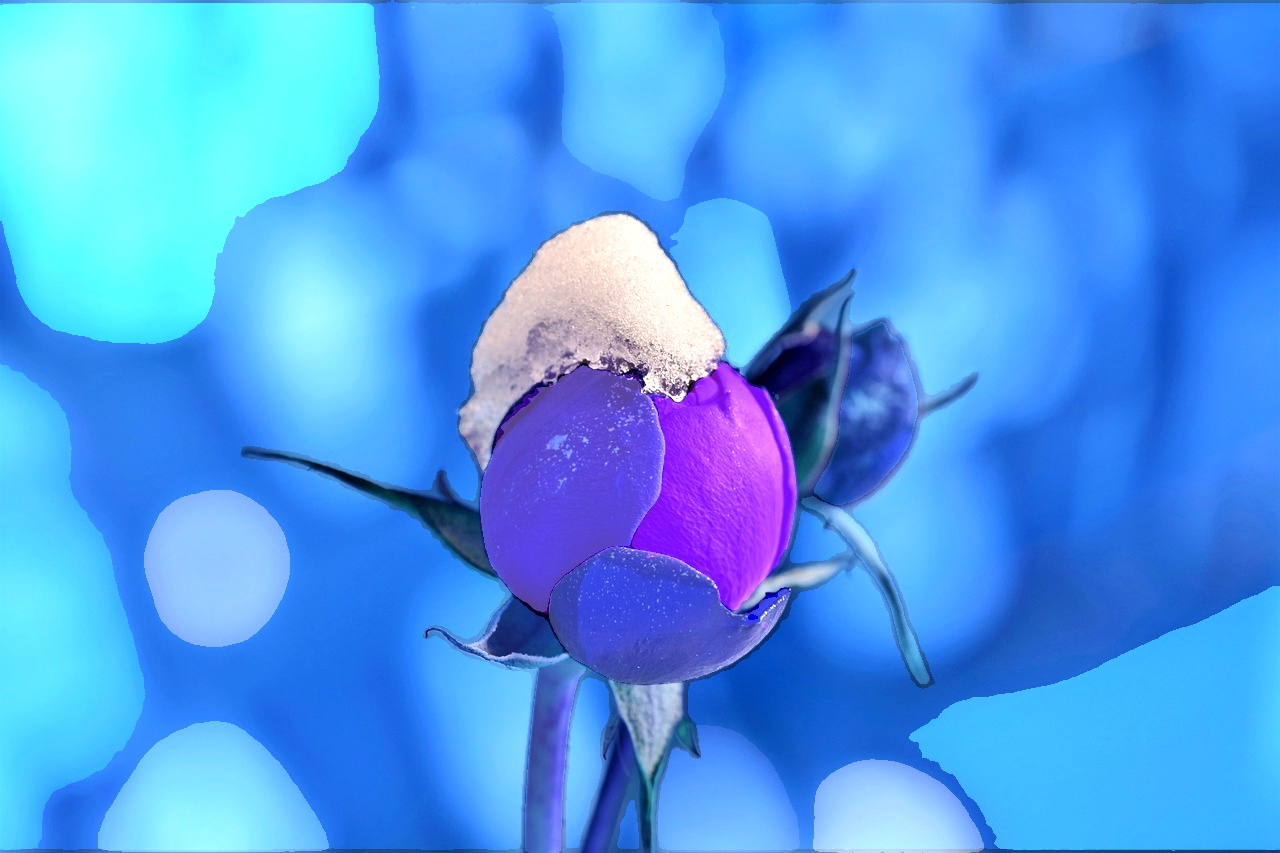

In [6]:
from IPython.display import Image
Image(filename='output.jpg') 

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

In [13]:
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

In [11]:
sam = sam_model_registry["vit_l"](checkpoint="/content/vit_l.pth")

In [14]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [17]:
image = cv2.imread('/content/rosebud-6006985_1280.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
masks = mask_generator.generate(image)

In [ ]:
masks

https://replicate.com/pablodawson/segment-anything-automatic/api

https://replicate.com/facebookresearch/mask2former/api

In [ ]:
!pip install replicate langchain

In [23]:
import os

os.environ['REPLICATE_API_TOKEN']='8d8515f51836505f328321757676e74ba7593e71'

In [24]:
import replicate
output = replicate.run(
    "pablodawson/segment-anything-automatic:14fbb04535964b3d0c7fad03bb4ed272130f15b956cbedb7b2f20b5b8a2dbaa0",
    input={"image": open("/content/rosebud-6006985_1280.jpg", "rb")}
)

In [28]:
output

'https://replicate.delivery/pbxt/yLUfGMcbLAXQaCY8q8yoo6L8OtCE4fUhno1DfrwEhWfPk1fFC/output_mask.png'

In [29]:
!wget https://replicate.delivery/pbxt/yLUfGMcbLAXQaCY8q8yoo6L8OtCE4fUhno1DfrwEhWfPk1fFC/output_mask.png

--2023-04-09 02:36:29--  https://replicate.delivery/pbxt/yLUfGMcbLAXQaCY8q8yoo6L8OtCE4fUhno1DfrwEhWfPk1fFC/output_mask.png
Resolving replicate.delivery (replicate.delivery)... 104.26.13.87, 172.67.71.67, 104.26.12.87, ...
Connecting to replicate.delivery (replicate.delivery)|104.26.13.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38300 (37K) [image/png]
Saving to: ‘output_mask.png’

output_mask.png     100%[===================>]  37.40K  --.-KB/s    in 0.003s  

2023-04-09 02:36:29 (13.5 MB/s) - ‘output_mask.png’ saved [38300/38300]



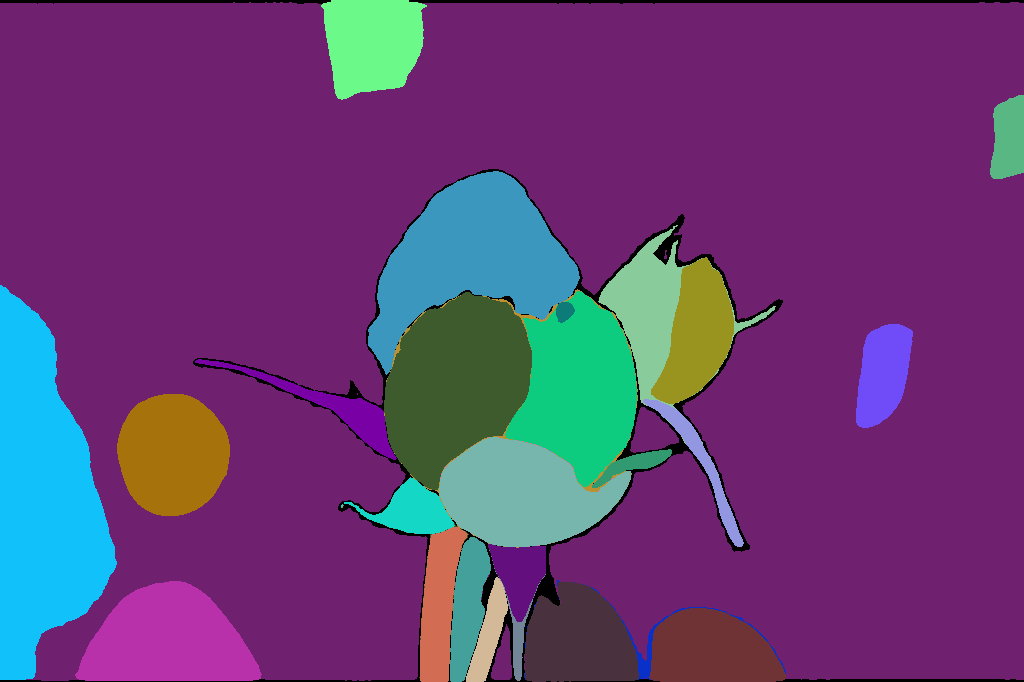

In [30]:
from IPython.display import Image
Image(filename='output_mask.png')

In [25]:
from langchain.llms import Replicate
from langchain import PromptTemplate, LLMChain

Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf", 
          input={'image_dimensions': '512x512'})

Replicate(cache=None, verbose=False, callback_manager=<langchain.callbacks.shared.SharedCallbackManager object at 0x7fedfb9f6400>, model='stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf', input={'image_dimensions': '512x512'}, model_kwargs={}, replicate_api_token='8d8515f51836505f328321757676e74ba7593e71')

In [26]:
text2image = Replicate(model="stability-ai/stable-diffusion:db21e45d3f7023abc2a46ee38a23973f6dce16bb082a930b0c49861f96d1e5bf", 
                       input={'image_dimensions': '512x512'})

In [27]:
image_output = text2image("A king kong riding a motorcycle by Picasso")
image_output

'https://replicate.delivery/pbxt/w9S6rgu9By6QFZVJVZA2CvgM20jk1uvA4QpqhJTU37ESWfXIA/out-0.png'

In [31]:
!wget https://replicate.delivery/pbxt/w9S6rgu9By6QFZVJVZA2CvgM20jk1uvA4QpqhJTU37ESWfXIA/out-0.png

--2023-04-09 02:37:27--  https://replicate.delivery/pbxt/w9S6rgu9By6QFZVJVZA2CvgM20jk1uvA4QpqhJTU37ESWfXIA/out-0.png
Resolving replicate.delivery (replicate.delivery)... 104.26.13.87, 104.26.12.87, 172.67.71.67, ...
Connecting to replicate.delivery (replicate.delivery)|104.26.13.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509556 (498K) [image/png]
Saving to: ‘out-0.png’

out-0.png           100%[===================>] 497.61K  --.-KB/s    in 0.05s   

2023-04-09 02:37:27 (10.7 MB/s) - ‘out-0.png’ saved [509556/509556]



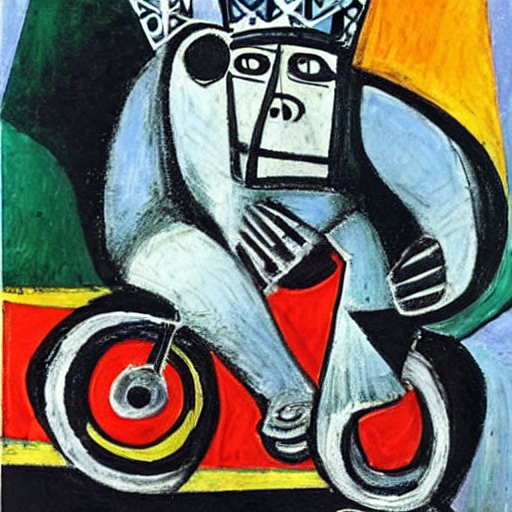

In [33]:
from IPython.display import Image
Image(filename='out-0.png')